# Decision Tree Learning and Cross-validation




## Scikit-learn

Scikit-learn, is a powerful open-source machine learning library for Python. Take a look at the main modules in scikit-learn: 
https://scikit-learn.org/stable/index.html

In this practical, we are going to use scikit-learn to build decision trees and use cross-validation to evaluate the models. 

The best source to study Scikit-learn is its documentation, where you can find tons of examples, and it's often useful to read the documentation for the key parameters and its usage for different classes and methods. 


## Iris data
We will start to play with the example on Scikit-learn: the famous Iris dataset. 

In [1]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.datasets import load_iris
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [2]:
# Load data
iris = load_iris()
# Here is the description of the dataset
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

## Plot the decision surface of a decision tree 

Plot the decision surface of a decision tree trained on pairs of features of the iris dataset - example from Scikit-learn.

See decision tree <tree> for more information on the estimator.

Below for each pair of iris features, the decision tree learns decision boundaries made of combinations of simple thresholding rules inferred from the training samples.



Automatically created module for IPython interactive environment


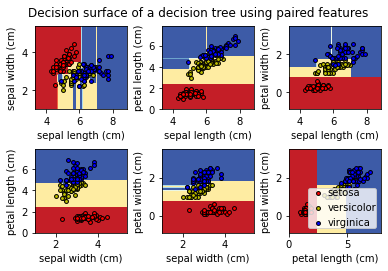

<Figure size 432x288 with 0 Axes>

In [3]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02


for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")

plt.figure()

plt.show()

## Question 1
Take a look at the decision surface plots, which variables do you think will be most useful or least useful for predicting the class labels (the type of iris)?

Most --> least

* PW vs PL
* PL vs SL
* PL vs SW
* PW vs SW
* SW vs SL
* SW vs SL

* PL 
* PW
* SW
* SL


## Visualise the decision tree

We now plot the tree structure of a model built on all of the features. 

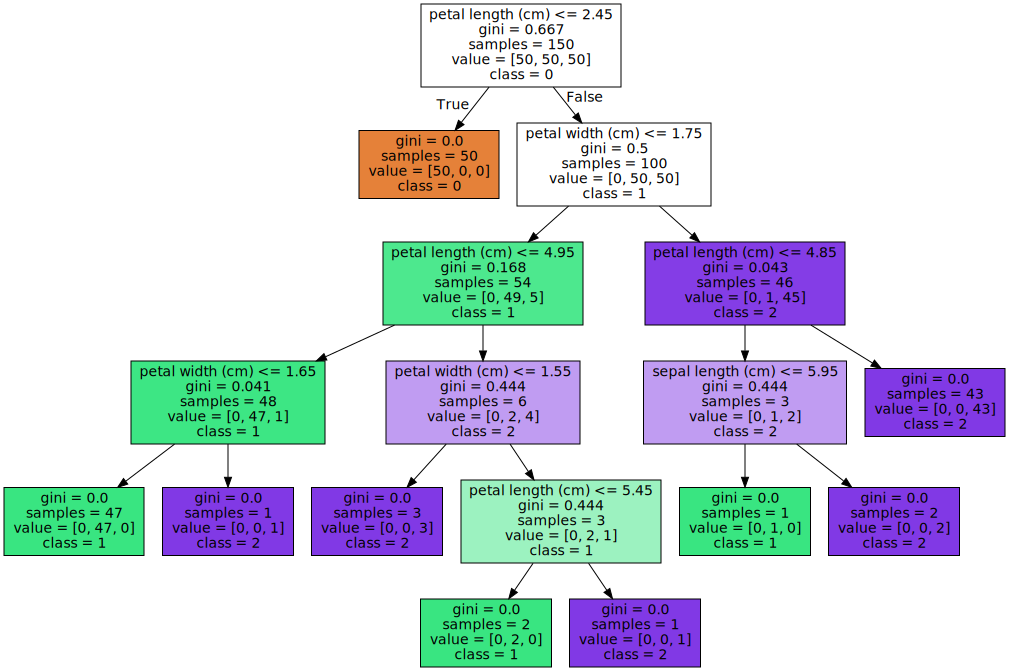

In [4]:
labels = iris.feature_names
clf = DecisionTreeClassifier().fit(iris.data, iris.target)
# from sklearn.tree plot_tree # plot_tree can be used to visualse if you dont have graphviz installed.
# plot_tree(clf, filled=True) # resolutin of the generated image is quite low though
# plt.show()
graph = Source(tree.export_graphviz(clf, out_file=None
   , feature_names=labels, class_names=['0', '1', '2'] 
   , filled = True))

display(SVG(graph.pipe(format='svg')))

## Question 2
Look at the above tree structure, have all the variables been selected for prediction? 
Does the variables selected by the tree in line with your answers in Question 1? 

It does I picked variables which provided the best fit

The Decision tree above shows a Gini index which is used to select the best attributte to split the tree on. You can see more the mathematicl formula for it [here](https://scikit-learn.org/stable/modules/tree.html)

For more info about the classifier and it's parameters and methods, you can check [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier).

##  Exercise 1
Step 1. Change the default criterion for decision tree from 'gini' to 'entropy' to use information gain instead. Plot the tree again, can you find any difference between the trees induced using two different criteria? No difference



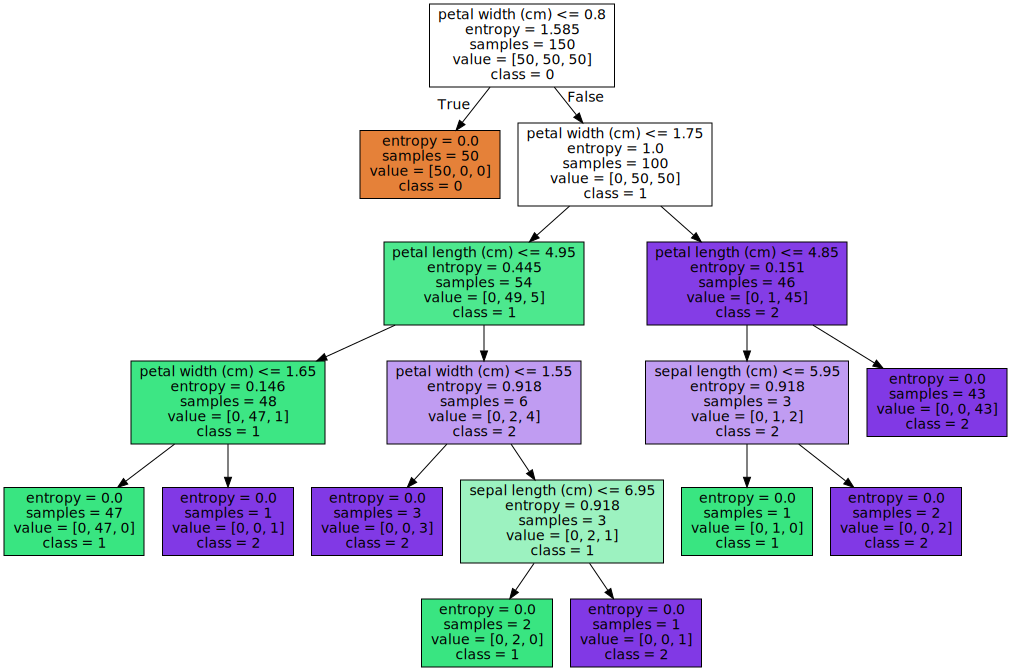

In [5]:
# Your code here
labels = iris.feature_names
clf = DecisionTreeClassifier(criterion="entropy").fit(iris.data, iris.target) # Added criterion="entropy"
# from sklearn.tree plot_tree # plot_tree can be used to visualse if you dont have graphviz installed.
# plot_tree(clf, filled=True) # resolutin of the generated image is quite low though
# plt.show()min_impurity_splitimport numpy as np
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
graph = Source(tree.export_graphviz(clf, out_file=None
   , feature_names=labels, class_names=['0', '1', '2'] 
   , filled = True))

display(SVG(graph.pipe(format='svg')))

Step 2. Reduce the tree size by limit the max_depth to 3. Which one is better in your opinion (by intuition): the shallower tree or the more complex one? 


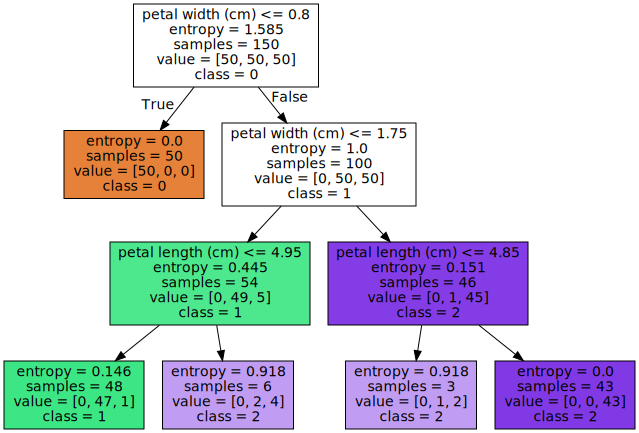

In [6]:
# Your code here
labels = iris.feature_names
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3).fit(iris.data, iris.target) # Added criterion="entropy + max_depth=3"
# from sklearn.tree plot_tree # plot_tree can be used to visualse if you dont have graphviz installed.
# plot_tree(clf, filled=True) # resolutin of the generated image is quite low though
# plt.show()
graph = Source(tree.export_graphviz(clf, out_file=None
   , feature_names=labels, class_names=['0', '1', '2'] 
   , filled = True))

display(SVG(graph.pipe(format='svg')))

## Question 3
What are the parameters in DecisionClassifier that you can change to control the complexity (size) of the tree? 
* max_leaf_nodes
* max_depth
* min_samples_split
* min_samples_leaf
* min_weight_fraction  
* min_impurity_split 


## Cross-validation

It's hard to say which model is better by just visualising the tree. Next We perform cross-validation to evaluate the performance of the models. 


### K-fold cross-validation
We use [cross_validate](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html) function in scikit-learn for k-fold cross-validation. 

In [7]:
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
def print_scores(clf):
    scores = cross_validate(clf, iris.data, iris.target, cv=10)
    # print(scores['test_score'])
    print(np.mean(scores['test_score']), "+/-", np.std(scores['test_score']))
print_scores(clf)

0.96 +/- 0.044221663871405324


### Exercise

Check the 10-fold cross-validation performance for  different settings of the decision tree classifier: e.g. with various max_length. 

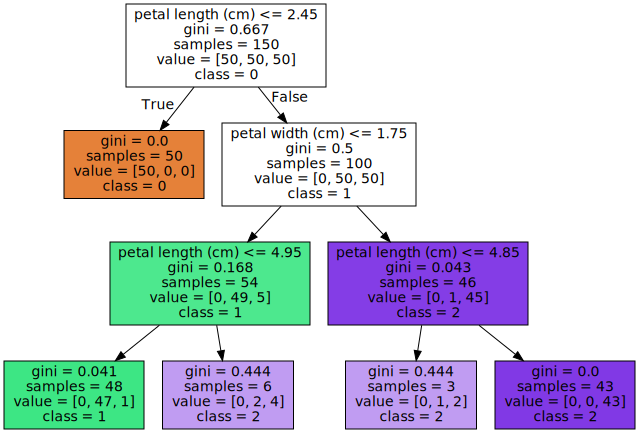

0.96 +/- 0.03265986323710903


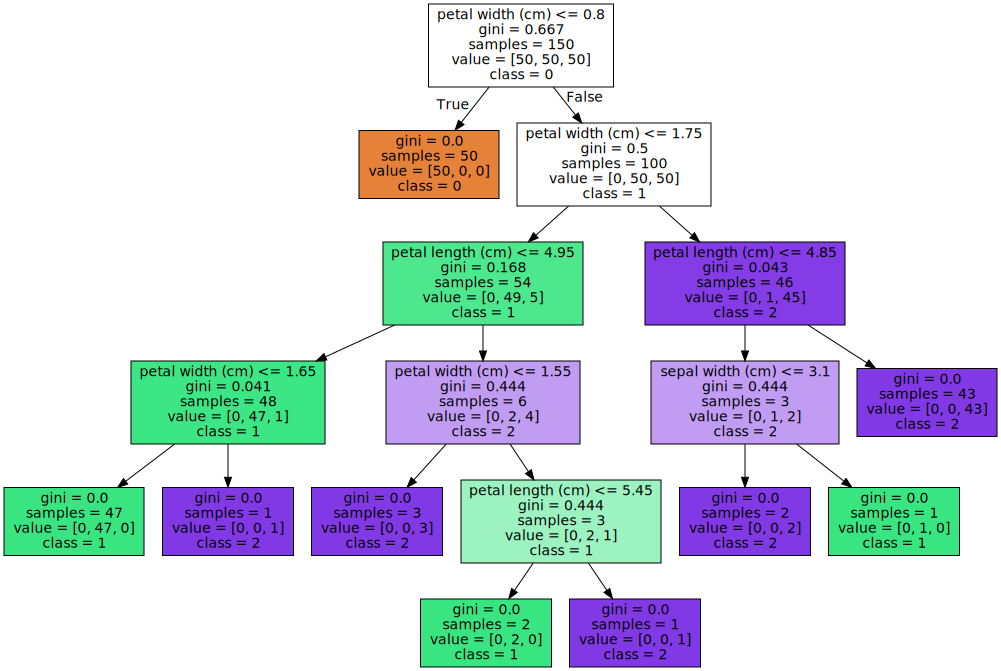

0.96 +/- 0.044221663871405324


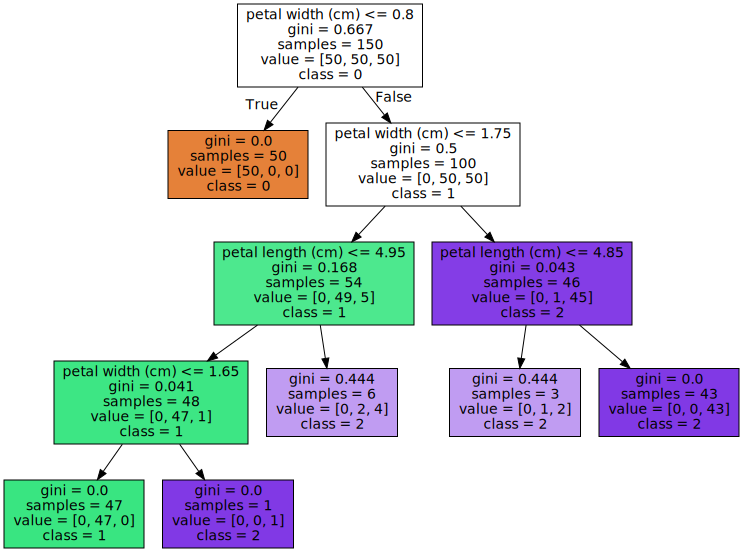

0.96 +/- 0.03265986323710903


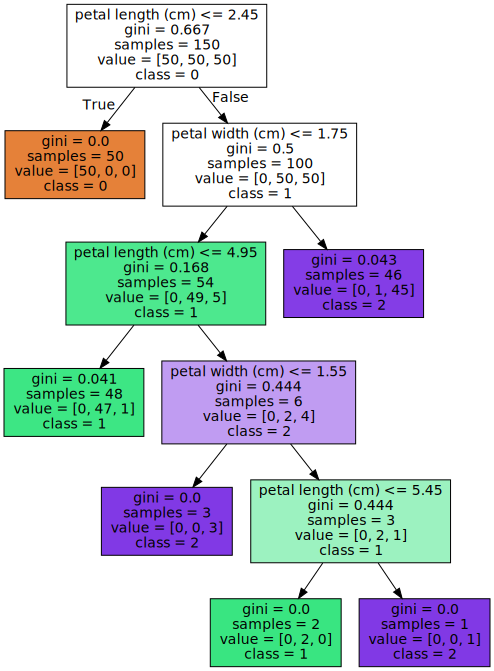

0.96 +/- 0.044221663871405324


In [8]:
# Change the tree complexity in Decision Classifier, and get the K-fold cross-validation performance
# Your code

def print_tree(clf): 
    # from sklearn.tree plot_tree # plot_tree can be used to visualse if you dont have graphviz installed.
    # plot_tree(clf, filled=True) # resolutin of the generated image is quite low though
    # plt.show()
    graph = Source(tree.export_graphviz(clf, out_file=None
    , feature_names=labels, class_names=['0', '1', '2']
    , filled = True))

    display(SVG(graph.pipe(format='svg')))

labels = iris.feature_names
clf = DecisionTreeClassifier(max_depth=3).fit(iris.data, iris.target) # Added criterion="entropy + max_depth=3"
print_tree(clf)
print_scores(clf)
clf = DecisionTreeClassifier(random_state=0).fit(iris.data, iris.target).fit(iris.data, iris.target)
print_tree(clf)
print_scores(clf)

clf = DecisionTreeClassifier(min_samples_split=25).fit(iris.data, iris.target)
print_tree(clf)
print_scores(clf)

clf = DecisionTreeClassifier(min_impurity_split=0.1).fit(iris.data, iris.target)
print_tree(clf)
print_scores(clf)




### Hold-out cross-validation
We can also split the data into training and test set using [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split), and use [classification_report](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-report) to obtain a performance report given the predicted and true target values. 

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X = iris.data
y = iris.target

# Split the data into 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train the classifier and make the prediction, feel free to change the default parameter settings, e.g. max_depth
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Just get a classification report.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## Titanic Dataset

Next you will revisit the Titanic dataset that we have explored in Practical0-2. 

Your task is to develop decision tree models using all the development data, and thenn use 5 fold cross-validation to evaluate the model peroformance. 

In [10]:
# Step 1. Build a tree using all the devleopment data
# Your code here
import pandas as pd

url = "https://raw.githubusercontent.com/ashishpatel26/Titanic-Machine-Learning-from-Disaster/master/input/train.csv"
titanic_data = pd.read_csv("train.csv", sep=",")
titanic_survive = titanic_data.Survived.to_numpy()
titanic_data = titanic_data.drop(['PassengerId','Name', 'Ticket', 'Cabin','Survived'], axis=1)
from scipy.stats import mode

# Fill in missing values with mode for discrete variables
mode_embarked = mode(titanic_data['Embarked'])[0][0]
titanic_data['Embarked'] = titanic_data['Embarked'].fillna(mode_embarked)
titanic_data['gender'] = titanic_data['Sex'].map({'female': 0, 'male': 1}).astype(int)
pd.get_dummies(titanic_data['Embarked'], prefix='Embarked').head(10)
titanic_data = pd.concat([titanic_data, pd.get_dummies(titanic_data['Embarked'], prefix='Embarked')], axis=1)
titanic_data = pd.concat([titanic_data, pd.get_dummies(titanic_data['Sex'], prefix='Sex')], axis=1)
titanic_data = titanic_data.drop(['Sex', 'Embarked',"Sex_female","Sex_male"], axis=1)
age_mean = titanic_data['Age'].mean()
titanic_data['Age'] = titanic_data['Age'].fillna(age_mean)

# Put column name to a list
cols = titanic_data.columns.tolist()

# # Reoder the column names and the dataframe (data) according the new column order
# cols = [cols[1]] + cols[0:1] + cols[2:]
# data = data[cols]


titanic_lablels  = list(titanic_data.columns.values)# View the data frame within a cell
titanic_data = titanic_data.to_numpy()
print(titanic_lablels)
# print(titanic_survive)
print(titanic_data)
titanic_clf = DecisionTreeClassifier(max_depth=4).fit(titanic_data, titanic_survive) # Added criterion="entropy + max_depth=3"



['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'gender', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
[[ 3.         22.          1.         ...  0.          0.
   1.        ]
 [ 1.         38.          1.         ...  1.          0.
   0.        ]
 [ 3.         26.          0.         ...  0.          0.
   1.        ]
 ...
 [ 3.         29.69911765  1.         ...  0.          0.
   1.        ]
 [ 1.         26.          0.         ...  1.          0.
   0.        ]
 [ 3.         32.          0.         ...  0.          1.
   0.        ]]


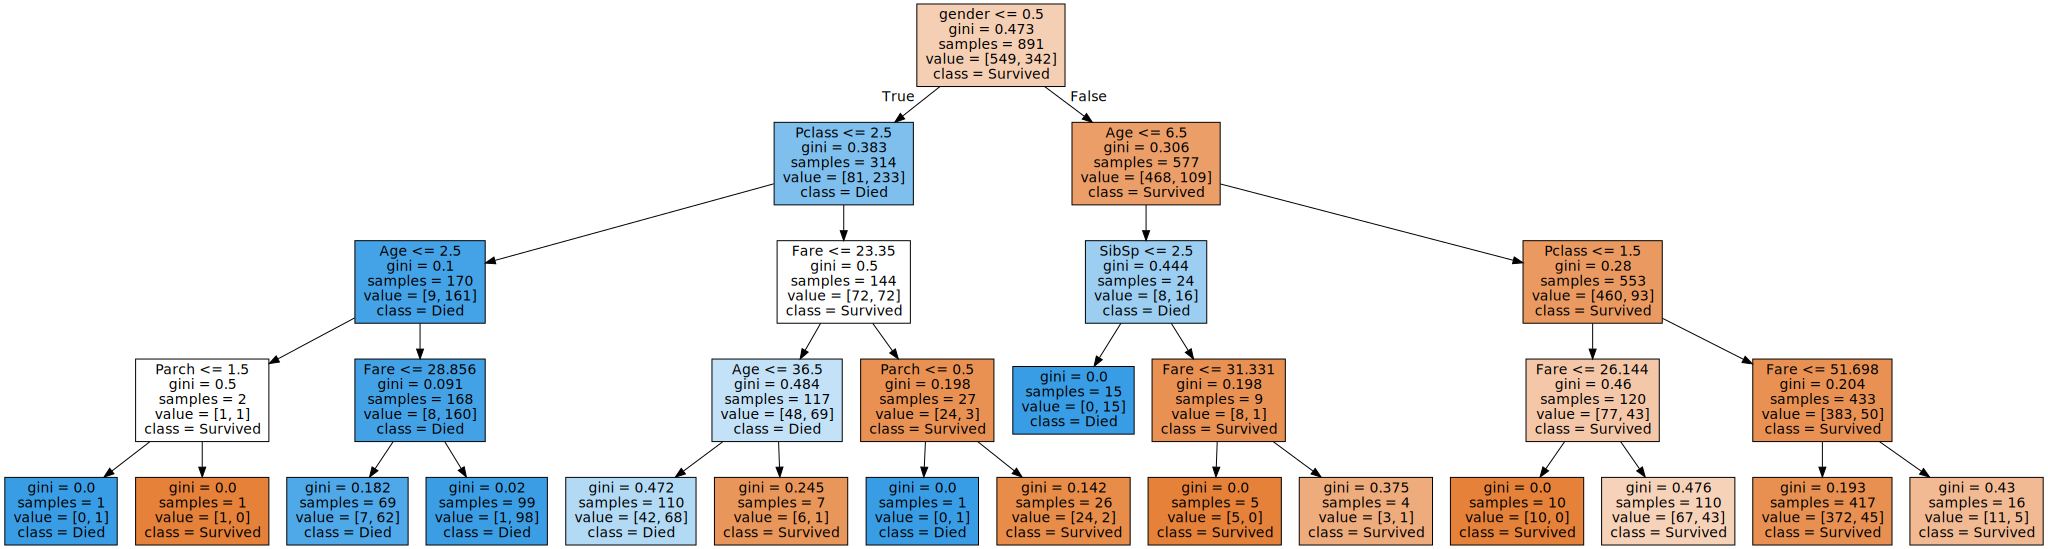

In [21]:
# Step 2. Visualise the tree
# Your code here
def print_tree(clf): 
    # from sklearn.tree plot_tree # plot_tree can be used to visualse if you dont have graphviz installed.
    # plot_tree(clf, filled=True) # resolutin of the generated image is quite low though
    # plt.show()
    graph = Source(tree.export_graphviz(clf, out_file=None
    , feature_names=titanic_lablels, class_names=['Survived', 'Died'] 
    , filled = True))

    display(SVG(graph.pipe(format='svg')))
print_tree(titanic_clf)

In [11]:
# Step 3. Evaluate the model performance using 5 fold cross-validation
# Your code here
scores = cross_validate(titanic_clf, titanic_data, titanic_survive, cv=5)
print(scores['test_score'])
print(np.mean(scores['test_score']), "+/-", np.std(scores['test_score']))

[0.75977654 0.8258427  0.80898876 0.78651685 0.84269663]
0.8047642960266147 +/- 0.029181756869796648


In [12]:
# Step 4. Train and Evaluate the model with hold-out cross-validation
# Your code here
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X = titanic_data
y = titanic_survive

# Split the data into 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train the classifier and make the prediction, feel free to change the default parameter settings, e.g. max_depth
titanic_clf = DecisionTreeClassifier(max_depth=3)
titanic_clf.fit(X_train, y_train)
y_pred = titanic_clf.predict(X_test)

# Just get a classification report.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.95      0.85       112
           1       0.85      0.52      0.65        67

    accuracy                           0.79       179
   macro avg       0.81      0.73      0.75       179
weighted avg       0.80      0.79      0.77       179



## Question for thoughts: 
Which variables have been used or selected by the decisionn tree model? 
* gender
* PClass
* Fare
* SibSp 
* Age
* Fare

Decision tree algorithm can be used for selecting useful features for model fitting. Are there any pitfalls here if features are selected just based on a single decision tree?

* Can overfit and work well on test data but in real world data.

* Mutiple trees allows a greater chance for the best tree to be found 
